### Here let's solve Lorenz 63 and see at what point we start getting chaotic behavior

In [1]:
# imports and config
import jax
import jax.numpy as jnp
import diffrax
import matplotlib.pyplot as plt

# Enable 64-bit floats in JAX (do this before creating JAX arrays / tracing)
jax.config.update("jax_enable_x64", True)

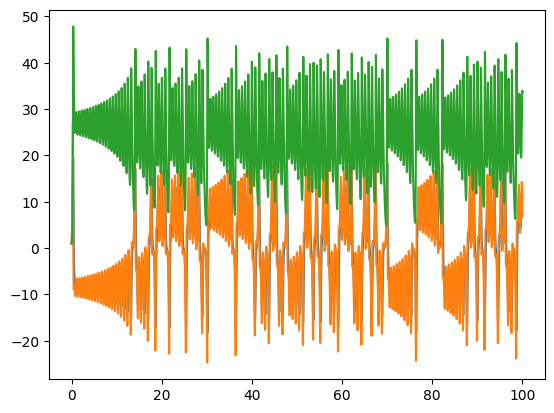

In [2]:
def lorenz_rhs(t, y, args):
    sigma, rho, beta = args
    x,y_,z = y
    return jnp.array([sigma*(y_-x), x*(rho-z)-y_, x*y_-beta*z])

solver = diffrax.Tsit5()
term = diffrax.ODETerm(lorenz_rhs)
saveat = diffrax.SaveAt(ts=jnp.linspace(0,100,20001))
stepsize_controller = diffrax.PIDController(rtol=1e-8, atol=1e-8)
sol = diffrax.diffeqsolve(term, 
                        solver, 
                        t0=0.0, 
                        t1=100.0, 
                        dt0=0.01,
                        y0=jnp.array([1.,1.,1.]), 
                        args=(10.,28.,8/3), 
                        saveat=saveat,
                        max_steps=200000
                        )

plt.plot(sol.ts, sol.ys)

In [ ]:
def lorenz_rhs(t, y, args):
    sigma, rho, beta = args
    x, y_, z = y
    return jnp.array([sigma * (y_ - x),
                      x * (rho - z) - y_,
                      x * y_ - beta * z], dtype=jnp.float64)

# Use float64 everywhere
solver = diffrax.Tsit5()
term = diffrax.ODETerm(lorenz_rhs)
saveat = diffrax.SaveAt(ts=jnp.linspace(0.0, 100.0, 20001, dtype=jnp.float64))
stepsize_controller = diffrax.PIDController(rtol=1e-12, atol=1e-12)
higher_def_sol = diffrax.diffeqsolve(
    term,
    solver,
    t0=jnp.float64(0.0),
    t1=jnp.float64(100.0),
    dt0=jnp.float64(0.01),
    y0=jnp.array([1.0, 1.0, 1.0], dtype=jnp.float64),
    args=(jnp.float64(10.0), jnp.float64(28.0), jnp.float64(8.0 / 3.0)),
    saveat=saveat,
    stepsize_controller=stepsize_controller,
    max_steps=200000,
)

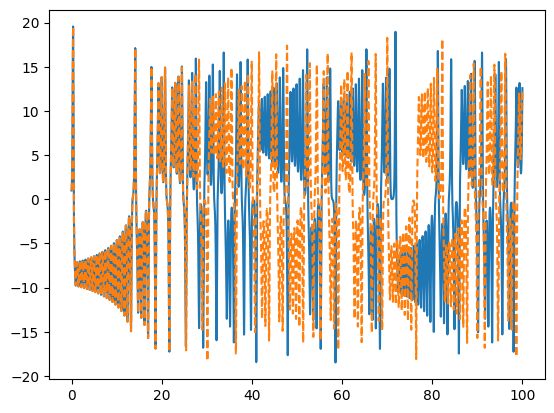

In [4]:
plt.plot(higher_def_sol.ts, higher_def_sol.ys[:, 0])
plt.plot(sol.ts, sol.ys[:, 0], linestyle='dashed')